# Sign Language Classification

In [4]:
############################################
# Using a dataset with 
# Letters instead of Digits in Sign Language
############################################

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## loading the csv file
X_TRAIN = pd.read_csv('./sign_mnist_train.csv')
X_TEST = pd.read_csv('./sign_mnist_test.csv')

In [20]:
############################################
# NOTE: I am changing target value of 24 to 9
# because the value 9 is skipped 
# in possible target values
############################################

## getting the target vector for training set
target_train = X_TRAIN["label"]
target_train[target_train == 24] = 9

## getting the feature matrix for training set
feature_matrix_train = X_TRAIN.drop("label", axis=1)
feature_matrix_train = feature_matrix_train.to_numpy()

## getting the target vector for testing set
target_test = X_TEST["label"]
target_test[target_test == 24] = 9

## getting the feature matrix for testing set
feature_matrix_test = X_TEST.drop("label", axis=1)
feature_matrix_test = feature_matrix_test.to_numpy()

3


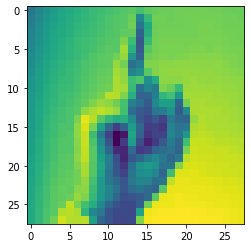

In [26]:
############################################
# Taking a look at an example image
############################################

## Here I am also going to initialize a variable IMG_SIZE
## which I 'll use later as well
## it is just the number of pixels on each side of a square image
IMG_SIZE = 28

plt.imshow(feature_matrix_train[0].reshape((IMG_SIZE, IMG_SIZE)))

print(target_train[0])

In [ ]:
############################################
# Because A - 0, B - 1, C - 2, and D - 3
# We can conclude that the target of the above feature vector makes sense
############################################

![image](./new_sign_lang/amer_sign2.png)

In [36]:
# model imports - sklearn
from sklearn.svm import SVC

# dimensionality reduction
from sklearn.decomposition import PCA

# pipeline
from sklearn.pipeline import make_pipeline

# for k-fold cross validation
from sklearn.model_selection import cross_val_score 

# SVM model

In [19]:
############################################
# Building a pipeline with SVM and PCA
############################################

pipe_svm = make_pipeline(PCA(n_components=50, random_state=1),
                         SVC(kernel='rbf', C=10, gamma='scale', random_state=1))

In [20]:
############################################
# features and targets are in the right format
# so we don't change anything for those here
############################################

X_train = feature_matrix_train
y_train = target_train

X_test = feature_matrix_test
y_test = target_test

In [22]:
############################################
# K fold cross validation (k = 10)
############################################

scores_svm = cross_val_score(estimator=pipe_svm,
                          X=X_train,
                          y=y_train,
                          cv=10,
                          n_jobs=-1) ## using all CPUs
print('CV accuracy scores: %s' % scores_svm)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_svm), np.std(scores_svm)))

CV accuracy scores: [1.         1.         1.         1.         0.99963583 1.
 1.         1.         1.         1.        ]
CV accuracy: 1.000 +/- 0.000


In [23]:
pipe_svm.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=50, random_state=1)),
                ('svc', SVC(C=10, random_state=1))])

In [24]:
from sklearn.metrics import accuracy_score

y_pred_svm = pipe_svm.predict(X_test)

print("accuracy: " + str(accuracy_score(y_test, y_pred_svm)))

accuracy: 0.8784160624651423


# Convolutional Neural Network

In [49]:
############################################
# importing the tensotflow modules
############################################

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [50]:
############################################
# getting the data into the right shape
############################################

# feature matrices have to be adjusted
X_train_cnn = feature_matrix_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test_cnn = feature_matrix_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# target vectors are unchanged
y_train_cnn = target_train
y_test_cnn = target_test

In [53]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X_train_cnn.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train_cnn, y_train_cnn, batch_size = 32, epochs=3, validation_split=0.1)

Epoch 1/3
773/773 [==============================] - 12s 16ms/step - loss: 1.3941e-06 - accuracy: 0.0409 - val_loss: 1.4099e-06 - val_accuracy: 0.0419
Epoch 2/3
773/773 [==============================] - 16s 20ms/step - loss: 1.3941e-06 - accuracy: 0.0409 - val_loss: 1.4099e-06 - val_accuracy: 0.0419
Epoch 3/3
773/773 [==============================] - 14s 18ms/step - loss: 1.3941e-06 - accuracy: 0.0409 - val_loss: 1.4099e-06 - val_accuracy: 0.0419


In [46]:
# Build the model
tf.random.set_seed(1)
model_1.build(input_shape=X_train_cnn.shape[1:])

# Show the model summary
print(model_1.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 15, 15, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 13, 13, 64)        18496     
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 6, 6, 64)          0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_13 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)              

In [48]:
# Compile the model
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])

# Train the model
history = model_1.fit(X_train, y_train, batch_size = 32, epochs=3, validation_split=0.1)

Epoch 1/3


ValueError: in user code:

    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_13 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: [None, 784]
